# Position Sizing Strategy Comparison
## Risk Profiles and Capital Dynamics Under Stochastic Returns

This notebook compares three common position sizing rules under identical conditions:

- Constant position size (baseline)
- Exponential position scaling (loss-triggered)
- Linear position scaling (incremental adjustment)

Each strategy is evaluated using Monte Carlo simulation to assess:
- Ruin probability (capital depletion)
- Distribution of final capital values
- Mean vs median outcomes (average vs typical behaviour)

All simulations are performed using the same parameters and random seed to ensure a controlled and fair comparison.


In [1]:
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath(".."))
sys.path.insert(0, os.path.abspath("../src"))

from src.rng import roulette_like_trial
from src.strategies.simple import simple_bettor
from src.strategies.martingale import martingale_bettor
from src.strategies.dalembert import dalembert_bettor
from src.runner import run_simulation

plt.style.use("seaborn-v0_8-darkgrid")
random.seed(42)

## 1. Simulation Parameters

All strategies are evaluated under identical assumptions. Differences in outcomes therefore arise **solely from the position sizing rule**, rather than from parameter choices or randomness.

In [2]:
initial_funds = 10_000
stake = 100
n_rounds = 100
n_bettors = 1000
p_win = 0.49
seed = 42

## 2. Monte Carlo Simulations

Each position sizing rule is simulated independently using identical parameters and random seeds. This allows a direct comparison of **risk profiles, tail behaviour, and capital outcomes**.

In [3]:
results = {}

results["Constant"] = run_simulation(
    simple_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=seed
)

results["Exponential"] = run_simulation(
    martingale_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=seed
)

results["Linear"] = run_simulation(
    dalembert_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=seed
)

## 3. Summary Statistics

The table below reports ruin rates and summary statistics for each position sizing rule.

In [4]:
summary = {}

for name, (final_values, broke_count) in results.items():
    summary[name] = {
        "Ruin Rate (%)": round(broke_count / n_bettors * 100, 2),
        "Mean Final Capital": round(np.mean(final_values), 2),
        "Median Final Capital": round(np.median(final_values), 2)
    }

summary

{'Constant': {'Ruin Rate (%)': 0.0,
  'Mean Final Capital': np.float64(9788.2),
  'Median Final Capital': np.float64(9800.0)},
 'Exponential': {'Ruin Rate (%)': 31.7,
  'Mean Final Capital': np.float64(9294.8),
  'Median Final Capital': np.float64(14000.0)},
 'Linear': {'Ruin Rate (%)': 24.6,
  'Mean Final Capital': np.float64(9012.7),
  'Median Final Capital': np.float64(11250.0)}}

## 4. Distribution Comparison

Histograms of final capital values are plotted side-by-side to highlight differences in **dispersion, skewness, and tail risk** across strategies.

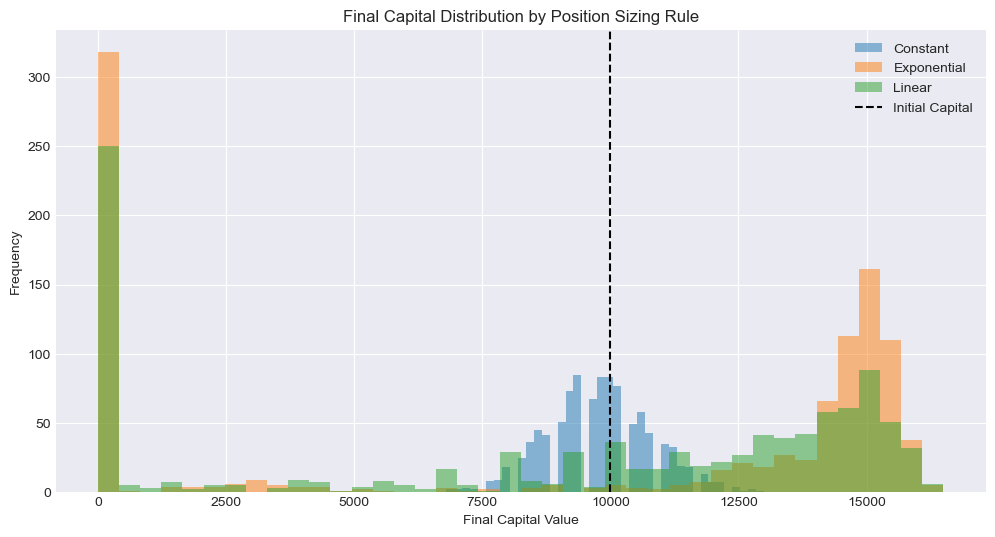

In [5]:
plt.figure(figsize=(12,6))

bins = 40

for name, (final_values, _) in results.items():
    plt.hist(final_values, bins=bins, alpha=0.5, label=name)

plt.axvline(initial_funds, color="black", linestyle="--", label="Initial Capital")
plt.title("Final Capital Distribution by Position Sizing Rule")
plt.xlabel("Final Capital Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Interpretation

- **Constant position sizing** produces the narrowest distribution but exhibits steady capital decay under negative drift.
- **Exponential scaling** generates highly skewed outcomes, with frequent modest gains offset by a high probability of catastrophic loss.
- **Linear scaling** reduces variance relative to exponential scaling but remains exposed to long-run capital erosion.

Across all strategies, expected returns remain negative, reflecting the underlying adverse drift of the return process.

## Summary

- No position sizing rule alters the expected value of a process with negative drift.
- Risk profiles differ substantially across strategies despite identical return assumptions.
- Variance suppression often comes at the cost of increased tail risk.
- Monte Carlo analysis is essential for distinguishing **typical outcomes** from **true long-run risk**.

This comparison highlights the distinction between volatility management and risk elimination, and illustrates why tail behaviour dominates capital outcomes in repeated-exposure settings.